In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns

In [2]:
data = pd.read_csv("E:\dataset\mobile_classification\\train.csv")

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
num_col = data.select_dtypes(exclude=['object'])

Text(0.5, 1.0, 'this is for data visualization.')

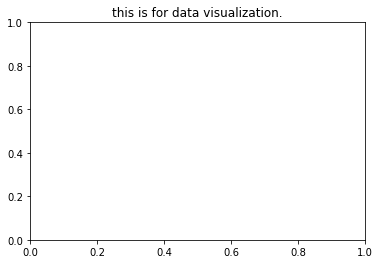

In [6]:
mtp.title("this is for data visualization.")

<AxesSubplot:xlabel='n_cores', ylabel='price_range'>

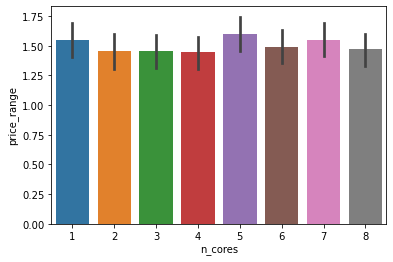

In [7]:
sns.barplot(x=data['n_cores'],y=data['price_range'])

Text(0.5, 0, 'this is ram')

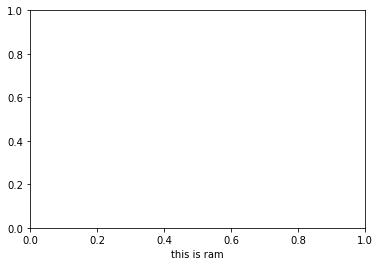

In [8]:
mtp.xlabel("this is ram")

<AxesSubplot:>

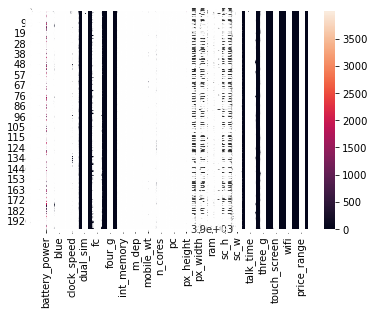

In [9]:
sns.heatmap(data=data, annot=True)

<AxesSubplot:xlabel='n_cores', ylabel='price_range'>

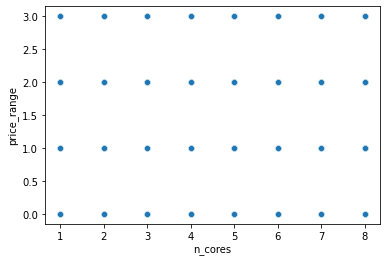

In [10]:
#scatter plot
sns.scatterplot(x=data['n_cores'],y=data['price_range'])

<AxesSubplot:xlabel='ram', ylabel='price_range'>

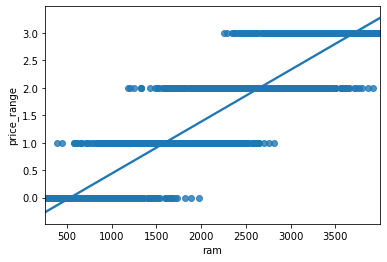

In [11]:
sns.regplot(x=data['ram'],y=data['price_range'])

<AxesSubplot:xlabel='ram', ylabel='price_range'>

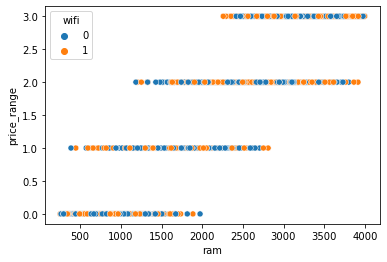

In [12]:
sns.scatterplot(x=data['ram'],y=data['price_range'],hue=data['wifi'])

In [13]:
# selecting feature
X = data.drop('price_range',axis=1)

In [14]:
y = data['price_range']

In [15]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)

In [57]:
X_train,x_val,y_train,y_val=train_test_split(X,y)

In [58]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [59]:
pred = model.predict(x_val)

In [60]:
mean_absolute_error(pred,y_val)

0.14

In [61]:
model.score(X,y)

0.961

In [62]:
print(confusion_matrix(y_val,pred))

[[105   4   0   0]
 [ 16 109  16   0]
 [  0  14 105  11]
 [  0   0   9 111]]


In [63]:
accuracy_score(y_val,pred)

0.86